### Facial Emotion Recognition

Dataset: [Download on Kaggle](https://www.kaggle.com/datasets/msambare/fer2013)

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sb
from keras.utils import plot_model
from keras import layers,models

import warnings
warnings.filterwarnings("ignore")

In [2]:
TRAIN_DATA = "../data/train/"
TEST_DATA = '../data/test'

In [3]:
angry = os.listdir(os.path.join(TRAIN_DATA,'angry'))
fear = os.listdir(os.path.join(TRAIN_DATA,'fear'))
sad = os.listdir(os.path.join(TRAIN_DATA,'sad'))
happy = os.listdir(os.path.join(TRAIN_DATA,'happy'))
surprise = os.listdir(os.path.join(TRAIN_DATA,'surprise'))

Text(0.5, 1.0, 'Training Data Image Distribution')

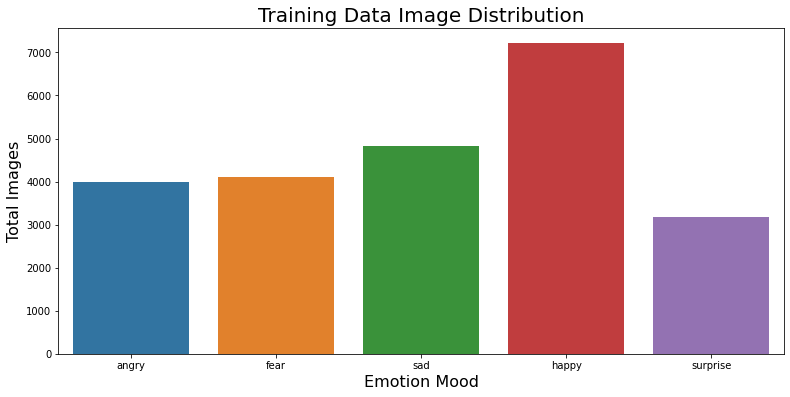

In [5]:
plt.figure(figsize=(13,6))
sb.barplot(
    ['angry','fear','sad','happy','surprise'],
    [len(angry),len(fear),len(sad),len(happy),len(surprise)]
)
plt.xlabel("Emotion Mood",fontsize=16)
plt.ylabel("Total Images",fontsize=16)
plt.title("Training Data Image Distribution",fontsize=20)

In [7]:
test_angry = os.listdir(os.path.join(TEST_DATA,'angry'))
test_fear = os.listdir(os.path.join(TEST_DATA,'fear'))
test_sad = os.listdir(os.path.join(TEST_DATA,'sad'))
test_happy = os.listdir(os.path.join(TEST_DATA,'happy'))
test_surprise = os.listdir(os.path.join(TEST_DATA,'surprise'))

Text(0.5, 1.0, 'Testing Data Image Distribution')

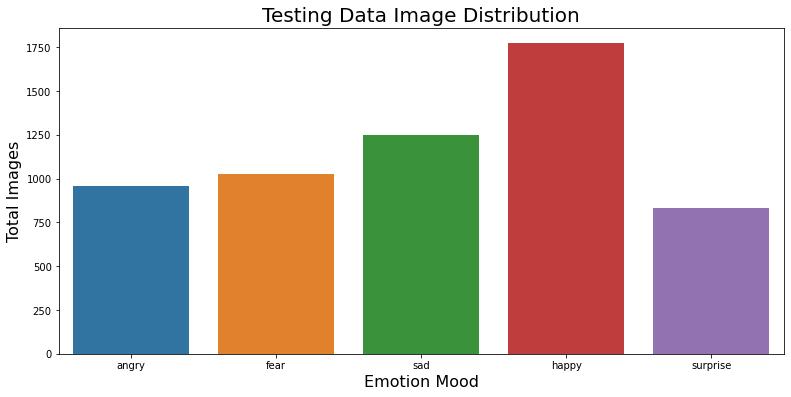

In [8]:
plt.figure(figsize=(13,6))
sb.barplot(
    ['angry','fear','sad','happy','surprise'],
    [len(test_angry),len(test_fear),len(test_sad),len(test_happy),len(test_surprise)]
)
plt.xlabel("Emotion Mood",fontsize=16)
plt.ylabel("Total Images",fontsize=16)
plt.title("Testing Data Image Distribution",fontsize=20)

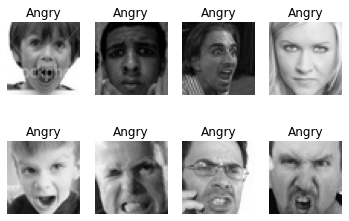

In [9]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'angry',angry[i])))
    plt.axis("off")
    plt.title("Angry")

In [10]:
sample_image = os.path.join(TRAIN_DATA,'angry',angry[10])

In [11]:
from PIL import Image

Image.open(sample_image).size

(48, 48)

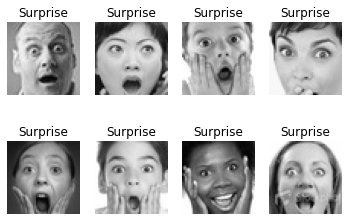

In [12]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'surprise',surprise[i])))
    plt.axis("off")
    plt.title("Surprise")

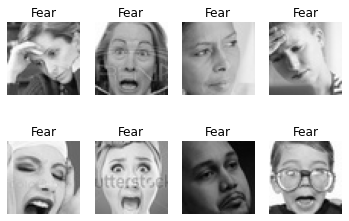

In [13]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'fear',fear[i])))
    plt.axis("off")
    plt.title("Fear")

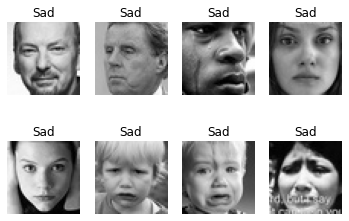

In [14]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'sad',sad[i])))
    plt.axis("off")
    plt.title("Sad")

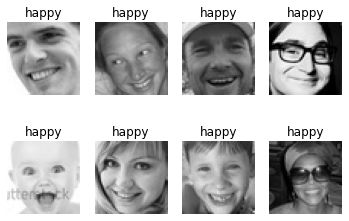

In [15]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(load_img(os.path.join(TRAIN_DATA,'happy',happy[i])))
    plt.axis("off")
    plt.title("happy")

In [16]:
train_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_aug = ImageDataGenerator(rescale=1./255)

In [32]:
training_data = train_aug.flow_from_directory(TRAIN_DATA,
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical')


testing_data = test_aug.flow_from_directory(TEST_DATA,
                                                batch_size=64,
                                                target_size=(224,224),
                                                shuffle=True,
                                                class_mode='categorical')

Found 23308 images belonging to 5 classes.
Found 5834 images belonging to 5 classes.


In [33]:
for image,label in training_data:
    print(image.shape)
    print(label.shape)
    break

(64, 224, 224, 3)
(64, 5)


In [34]:
training_data.class_indices

{'angry': 0, 'fear': 1, 'happy': 2, 'sad': 3, 'surprise': 4}

In [20]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

2022-09-10 10:13:45.189959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-10 10:13:45.190032: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-10 10:13:45.190064: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (lucifertrj): /proc/driver/nvidia/version does not exist
2022-09-10 10:13:45.249213: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model= keras.models.Sequential()

model.add(keras.layers.Conv2D(32, (3,3), activation="relu",padding="same",input_shape=(48, 48, 3)))
model.add(keras.layers.Conv2D(32, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))

model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64, (3,3), activation="relu",padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5,activation="softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 64)       

In [23]:
import datetime
chk_path = 'model.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = keras.callbacks.ModelCheckpoint(filepath=chk_path,
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss')

earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                          min_delta=0, 
                          patience=3, 
                          verbose=1, 
                          restore_best_weights=True)
                        
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                              factor=0.2, 
                              patience=6, 
                              verbose=1, 
                              min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = keras.callbacks.CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger]

In [24]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=1e-4),
  loss="categorical_crossentropy",
  metrics=['accuracy'])

In [82]:
hist = model.fit_generator(training_data,validation_data=testing_data,epochs=65,callbacks=callbacks)

Epoch 1/65
449/449 [==============================] - ETA: 0s - loss: 1.8188 - accuracy: 0.2432
Epoch 1: val_loss improved from 1.80723 to 1.78375, saving model to model.h5
449/449 [==============================] - 150s 332ms/step - loss: 1.8188 - accuracy: 0.2432 - val_loss: 1.7837 - val_accuracy: 0.2503 - lr: 1.0000e-04
Epoch 2/65
449/449 [==============================] - ETA: 0s - loss: 1.8091 - accuracy: 0.2446
Epoch 2: val_loss did not improve from 1.78375
449/449 [==============================] - 167s 373ms/step - loss: 1.8091 - accuracy: 0.2446 - val_loss: 2.1841 - val_accuracy: 0.2498 - lr: 1.0000e-04
Epoch 3/65
449/449 [==============================] - ETA: 0s - loss: 1.8064 - accuracy: 0.2480
Epoch 3: val_loss improved from 1.78375 to 1.76490, saving model to model.h5
449/449 [==============================] - 157s 351ms/step - loss: 1.8064 - accuracy: 0.2480 - val_loss: 1.7649 - val_accuracy: 0.2671 - lr: 1.0000e-04
Epoch 4/65
449/449 [==============================] - E

449/449 [==============================] - ETA: 0s - loss: 1.2734 - accuracy: 0.5186
Epoch 53: val_loss did not improve from 1.12679
449/449 [==============================] - 149s 332ms/step - loss: 1.2734 - accuracy: 0.5186 - val_loss: 1.1301 - val_accuracy: 0.5596 - lr: 1.0000e-04
Epoch 54/65
449/449 [==============================] - ETA: 0s - loss: 1.2693 - accuracy: 0.5203
Epoch 54: val_loss did not improve from 1.12679
449/449 [==============================] - 146s 325ms/step - loss: 1.2693 - accuracy: 0.5203 - val_loss: 1.2047 - val_accuracy: 0.5386 - lr: 1.0000e-04
Epoch 55/65
449/449 [==============================] - ETA: 0s - loss: 1.2572 - accuracy: 0.5236
Epoch 55: val_loss improved from 1.12679 to 1.10298, saving model to model.h5
449/449 [==============================] - 144s 321ms/step - loss: 1.2572 - accuracy: 0.5236 - val_loss: 1.1030 - val_accuracy: 0.5729 - lr: 1.0000e-04
Epoch 56/65
449/449 [==============================] - ETA: 0s - loss: 1.2586 - accuracy: 0

### Save Model

In [83]:
model.save("FacialEmotionRecognition.h5")
model.save_weights("FacialEmotion_weights.h5")

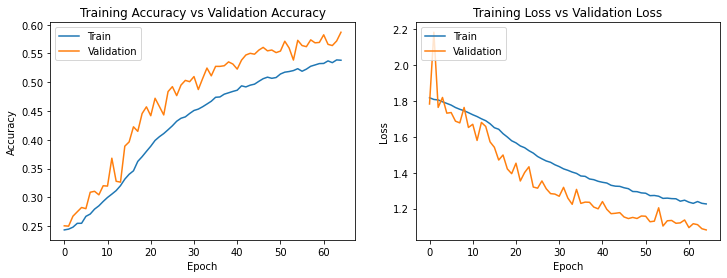

In [85]:
fig , ax = plt.subplots(1,2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(hist.history['accuracy'])
ax[0].plot(hist.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(hist.history['loss'])
ax[1].plot(hist.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [31]:
learning_rate = 1e-5 
lr_start = 0.00000001
lr_min = 0.000001
lr_max = 3e-5 
lr_rampup_epochs = 1
lr_sustain_epochs = 1
lr_exp_decay = 0.75

def lrfn(epoch):
    if epoch < lr_rampup_epochs:
        lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
    elif epoch < lr_rampup_epochs + lr_sustain_epochs:
        lr = lr_max
    else:
        lr = (lr_max - lr_min) * lr_exp_decay**(epoch - lr_rampup_epochs - lr_sustain_epochs) + lr_min
    return lr

### RESNET

In [32]:
earlyStop = keras.callbacks.EarlyStopping(patience= 5)
lrCallback = keras.callbacks.LearningRateScheduler(lrfn)
resCallbacks = [earlyStop, lrCallback]

In [33]:
resmodel = keras.applications.ResNet50(include_top=False,weights='imagenet',classes=7,input_shape=(48,48,3))

In [34]:
ResModel = keras.models.Sequential()
ResModel.add(resmodel)
ResModel.add(keras.layers.Flatten())
ResModel.add(keras.layers.Dense(512,activation="relu"))
ResModel.add(keras.layers.Dropout(0.5))
ResModel.add(keras.layers.Dense(7,activation="softmax"))

In [35]:
ResModel.trainable = False

In [76]:
ResModel.compile(loss='categorical_crossentropy',
                 optimizer="rmsprop",
                 metrics=['acc'])

In [78]:
Reshistory = ResModel.fit_generator(
    training_data,
    steps_per_epoch=100,
    epochs=1,
    validation_data=testing_data,
    validation_steps=45,
    callbacks=rescallbacks)


Epoch 1: LearningRateScheduler setting learning rate to 1e-08.
100/100 [==============================] - 56s 535ms/step - loss: 2.4858 - acc: 0.1477 - val_loss: 2.0918 - val_acc: 0.1767 - lr: 1.0000e-08


### Save RESNET Model

In [ ]:
ResModel.save("FacialEmotion_RESNET.h5")
ResModel.save_weights("FacialEmotion_RESNET.h5")

### VGG

In [65]:
vggmodel = keras.applications.VGG16(include_top=False,weights='imagenet',classes=7,input_shape=(48,48,3))

In [66]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### Fine Tuning

In [90]:
set_trainable = False
for layer in vggmodel.layers:
    if layer.name == 'block5_conv1':
        print("In")
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In


In [69]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [70]:
vggModel = keras.models.Sequential()
vggModel.add(vggmodel)
vggModel.add(keras.layers.Flatten())
vggModel.add(keras.layers.Dense(512,activation="relu"))
vggModel.add(keras.layers.Dropout(0.5))
vggModel.add(keras.layers.Dense(7,activation="softmax"))

In [72]:
vggModel.compile(loss='categorical_crossentropy',
                 optimizer=keras.optimizers.RMSprop(lr=1e-5),
                 metrics=['acc'])

In [38]:
import numpy as np


class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    """Stop training when the loss is at its min, i.e. the loss stops decreasing.

  Arguments:
      patience: Number of epochs to wait after min has been hit. After this
      number of no improvement, training stops.
  """

    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        # best_weights to store the weights at which the minimum loss occurs.
        self.best_weights = None

    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        # Initialize the best as infinity.
        self.best = np.Inf

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)

    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" % (self.stopped_epoch + 1))

## TRAIN FOR 100 epochs

In [77]:
vggHistory = vggModel.fit_generator(
    training_data,
    steps_per_epoch=100,
    epochs=1,
    validation_data=testing_data,callbacks=[EarlyStoppingAtMinLoss()])

100/100 [==============================] - 159s 2s/step - loss: 1.8276 - acc: 0.2434 - val_loss: 1.7039 - val_acc: 0.3196


### Save VGG Weights

In [ ]:
vggModel.save("FacialEmotion_VGG.h5")
vggModel.save_weights("FacialEmotion_VGG.h5")

### EfficientNet

In [80]:
eff_model = keras.applications.EfficientNetB0(weights="imagenet",classes=7,include_top=False,input_shape=(48,48,3))

16705208/16705208 [==============================] - 19s 1us/step


In [81]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_6[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 48, 48, 3)    0           ['normalization[0][0]']          
                                                                                     

                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 12, 12, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 12, 12, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 12, 12, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_b

 block3b_dwconv (DepthwiseConv2  (None, 6, 6, 240)   6000        ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 6, 6, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 6, 6, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
          

 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 3, 3, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 3, 3, 112)    53760       ['block5a_se_excite[0][0]']      
          

                                                                                                  
 block5c_project_bn (BatchNorma  (None, 3, 3, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 3, 3, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 3, 3, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 3, 3, 672)    75264       ['block5c_add[0][0]']            
          

                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 2, 2, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 2, 2, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 2, 2, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_d

 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 2, 2, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 2, 2, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 2, 2, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
          

### Fine Tuning

In [100]:
eff_model.trainable = False
set_trainable = False
for eL in eff_model.layers:
    if eL.name in ['block6d_expand_conv','block4a_expand_conv','block7a_expand_conv']:
        print("In")
        set_trainable = True
    if set_trainable:
        eL.trainable = True
    else:
        eL.trainable = False

In
In
In


In [101]:
eff_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_6[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 48, 48, 3)    0           ['normalization[0][0]']          
                                                                                     

                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 12, 12, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 12, 12, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2b_dwconv (DepthwiseConv2  (None, 12, 12, 144)  1296       ['block2b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2b_b

 block3b_dwconv (DepthwiseConv2  (None, 6, 6, 240)   6000        ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 6, 6, 240)   960         ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 6, 6, 240)   0           ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
                                                                                                  
 block4b_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block4b_se_reshape[0][0]']     
                                                                                                  
 block4b_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4b_se_reduce[0][0]']      
          

 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_se_excite (Multiply)   (None, 3, 3, 480)    0           ['block5a_activation[0][0]',     
                                                                  'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, 3, 3, 112)    53760       ['block5a_se_excite[0][0]']      
          

                                                                                                  
 block5c_project_bn (BatchNorma  (None, 3, 3, 112)   448         ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 3, 3, 112)    0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_add (Add)              (None, 3, 3, 112)    0           ['block5c_drop[0][0]',           
                                                                  'block5b_add[0][0]']            
                                                                                                  
 block6a_expand_conv (Conv2D)   (None, 3, 3, 672)    75264       ['block5c_add[0][0]']            
          

                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 2, 2, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 2, 2, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_expand_activation (Act  (None, 2, 2, 1152)  0           ['block6c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6c_d

 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 2, 2, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 2, 2, 1152)  10368       ['block7a_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block7a_bn (BatchNormalization  (None, 2, 2, 1152)  4608        ['block7a_dwconv[0][0]']         
 )                                                                                                
          

In [102]:
effModel = keras.models.Sequential()
effModel.add(eff_model)
effModel.add(keras.layers.Flatten())
effModel.add(keras.layers.Dense(512,activation="relu"))
effModel.add(keras.layers.Dropout(0.5))
effModel.add(keras.layers.Dense(7,activation="softmax"))

In [107]:
effModel.compile(loss='categorical_crossentropy',
                 optimizer=keras.optimizers.RMSprop(lr=1e-5),
                 metrics=['acc'])

In [109]:
effHistory = effModel.fit_generator(
    training_data,
    steps_per_epoch=100,
    epochs=1,
    validation_data=testing_data,
    callbacks=[EarlyStoppingAtMinLoss()])

100/100 [==============================] - 74s 725ms/step - loss: 2.2982 - acc: 0.1842 - val_loss: 2.0010 - val_acc: 0.1417


### Save Weights

In [ ]:
effModel.save("FacialEmotion_EFFB0).h5")
effModel.save_weights("FacialEmotion_EFFB0.h5")

## GoogleNet

In [26]:
#define inception layer

def inception(_input, filters):
    layer1 = layers.Conv2D(filters[0],(1,1), strides=1, padding='same', activation='relu')(_input)
    
    layer2 = layers.Conv2D(filters[1][0], (1,1), strides=1, padding='same', activation='relu')(_input)
    layer2 = layers.Conv2D(filters[1][1], (3,3), strides=1, padding='same', activation='relu')(layer2)
    
    layer3 = layers.Conv2D(filters[2][0], (1,1), strides=1, padding='same', activation='relu')(_input)
    layer3 = layers.Conv2D(filters[2][1], (5,5), strides=1, padding='same', activation='relu')(layer3)

    layer4 = layers.MaxPooling2D((3,3), strides=1, padding='same')(_input)
    layer4 = layers.Conv2D(filters[3],(1,1), strides=1, padding='same', activation='relu')(layer4)

    return layers.Concatenate(axis=-1)([layer1,layer2,layer3,layer4])

In [30]:
def GoogleNet():
    input_layer = layers.Input(shape=(224,224,3))
    
    layer = layers.Conv2D(filters=64, kernel_size=(7,7), strides=2, padding='same', activation='relu')(input_layer)
    layer = layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    layer = layers.BatchNormalization()(layer)
    
    layer = layers.Conv2D(filters=64, kernel_size=(1,1), strides=1, padding='same', activation='relu')(layer)
    layer = layers.Conv2D(filters=192, kernel_size=(3,3), strides=1, padding='same', activation='relu')(layer)
    layer = layers.BatchNormalization()(layer)
    layer = layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)

    layer = inception(layer, [ 64,  (96,128), (16,32), 32]) #3a
    layer = inception(layer, [128, (128,192), (32,96), 64]) #3b
    layer = layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    
    layer = inception(layer, [192,  (96,208),  (16,48),  64]) #4a
    layer = inception(layer, [160, (112,224),  (24,64),  64]) #4b
    layer = inception(layer, [128, (128,256),  (24,64),  64]) #4c
    layer = inception(layer, [112, (144,288),  (32,64),  64]) #4d
    layer = inception(layer, [256, (160,320), (32,128), 128]) #4e
    layer = layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(layer)
    
    layer = inception(layer, [256, (160,320), (32,128), 128]) #5a
    layer = inception(layer, [384, (192,384), (48,128), 128]) #5b
    #after 5th inception layers; apply Average Pooling with (7,7)/1
    layer = layers.AveragePooling2D(pool_size=(7,7), strides=1, padding='valid')(layer)
    #averagepooling is the only layer with valid padding

    layer = layers.Flatten()(layer)
    layer = layers.Dropout(0.4)(layer)
    layer = layers.Dense(units=256, activation='linear')(layer)
    output = layers.Dense(units=5, activation='softmax')(layer)
    
    model = models.Model(inputs=input_layer, outputs=output)
    
    return model

In [35]:
googleNet_model = GoogleNet()
#cross check the GoogleNet Architecture with model.summary()
googleNet_model.summary()

## Train the Model

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_65 (Conv2D)             (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_17 (MaxPooling2D  (None, 56, 56, 64)  0           ['conv2d_65[0][0]']              
 )                                                                                          

 concatenate_11 (Concatenate)   (None, 14, 14, 512)  0           ['conv2d_80[0][0]',              
                                                                  'conv2d_82[0][0]',              
                                                                  'conv2d_84[0][0]',              
                                                                  'conv2d_85[0][0]']              
                                                                                                  
 conv2d_87 (Conv2D)             (None, 14, 14, 112)  57456       ['concatenate_11[0][0]']         
                                                                                                  
 conv2d_89 (Conv2D)             (None, 14, 14, 24)   12312       ['concatenate_11[0][0]']         
                                                                                                  
 max_pooling2d_23 (MaxPooling2D  (None, 14, 14, 512)  0          ['concatenate_11[0][0]']         
 )        

                                                                  'conv2d_109[0][0]']             
                                                                                                  
 max_pooling2d_27 (MaxPooling2D  (None, 7, 7, 832)   0           ['concatenate_15[0][0]']         
 )                                                                                                
                                                                                                  
 conv2d_111 (Conv2D)            (None, 7, 7, 160)    133280      ['max_pooling2d_27[0][0]']       
                                                                                                  
 conv2d_113 (Conv2D)            (None, 7, 7, 32)     26656       ['max_pooling2d_27[0][0]']       
                                                                                                  
 max_pooling2d_28 (MaxPooling2D  (None, 7, 7, 832)   0           ['max_pooling2d_27[0][0]']       
 )        

In [36]:
googleNet_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
gN_History = googleNet_model.fit(training_data,validation_data=testing_data,epochs=30,callbacks=[EarlyStoppingAtMinLoss()])

Epoch 1/30


### Evaluation Metrics

In [111]:
y_pred = vggModel.predict(testing_data)
y_pred = np.argmax(y_pred, axis=1)
class_labels = testing_data.class_indices
class_labels = {v:k for k,v in class_labels.items()}

113/113 [==============================] - 70s 623ms/step


In [115]:
from sklearn.metrics import classification_report, confusion_matrix
cm_train = confusion_matrix(testing_data.classes, y_pred)
print('Confusion Matrix')
print(cm_train)
print('Classification Report')

Confusion Matrix
[[   8    0   10  716   86   57   81]
 [   6    0    0   81    9    2   13]
 [  12    0   12  748   94   65   93]
 [  24    0   25 1288  165   91  181]
 [  22    0   14  915  111   70  101]
 [  29    0   10  927  112   73   96]
 [   6    0    4  597   80   57   87]]
Classification Report


In [116]:
import seaborn as sns

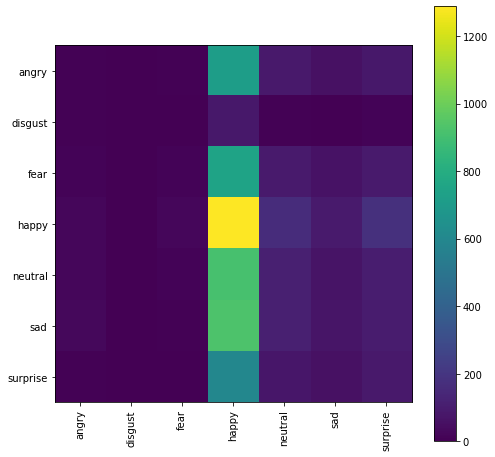

In [117]:
plt.figure(figsize=(8,8))
plt.imshow(cm_train, interpolation='nearest')
plt.colorbar()
tick_mark = np.arange(len(target_names))
_ = plt.xticks(tick_mark, target_names, rotation=90)
_ = plt.yticks(tick_mark, target_names)